In [12]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [15]:
with open('DataWrangling/df_features_train_large.pickle', 'rb') as f:
    df_train = pickle.load(f)[0:35000]
#     df_train = pickle.load(f)

df_train.tail()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
organ_electronic_069-057-100,1,-430.232666,80.923988,29.618086,24.383532,21.748594,7.200748,-2.230300,-9.638952,-11.631018,...,0.078640,0.392354,0.055954,0.052556,0.044762,0.059560,0.741903,0.049002,0.042979,6
organ_electronic_083-058-127,0,-370.104370,94.180611,17.952789,54.092304,31.735233,-21.369831,-7.224111,0.922746,-13.569631,...,0.046724,0.063593,0.206549,0.042648,0.007650,0.040465,0.137511,0.820487,0.143924,6
organ_electronic_107-087-127,1,-380.342224,73.568413,-51.381821,25.520178,8.200453,-21.187290,-14.008823,-18.819521,-6.937093,...,0.704254,0.089009,0.071561,0.068085,0.064678,0.066121,0.070902,0.479901,0.070072,6
organ_electronic_059-049-127,0,-334.417664,121.707146,-4.809134,43.118679,32.923649,-10.241476,-7.892303,-1.288287,-3.714402,...,0.055674,0.054691,0.051833,0.039116,0.067840,0.386680,0.072721,0.053378,0.100825,6
organ_electronic_053-051-127,1,-512.174500,38.414883,26.979179,19.643518,14.148470,13.277599,8.459444,1.084447,-4.627030,...,0.839203,0.097637,0.057110,0.046127,0.058697,0.039102,0.061227,0.066773,0.034931,6


In [16]:
df_train.shape

(35000, 167)

In [32]:
with open('DataWrangling/df_features_test_large.pickle', 'rb') as f:
    df_test = pickle.load(f)
# df_test = df_test.drop(['bass_synthetic_068-049-025'])
df_test = df_test.filter(regex=r'(bass*|brass*|flute*|guitar*|keyboard*|mallet*|organ*)', axis=0)
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865784,46.664146,34.379799,24.787592,17.420424,10.198802,4.609534,1.380598,-1.023342,...,0.034056,0.035498,0.025267,0.019353,0.038954,0.092328,0.087519,0.061090,0.091117,0
keyboard_electronic_001-021-127,0,-444.647125,193.894592,27.295811,-3.687870,6.295289,8.091360,10.286986,6.085114,2.499446,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.374725,59.548592,2.893683,-12.038996,-12.553400,-11.452487,-12.534291,-20.458334,-19.255125,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
flute_acoustic_002-077-100,1,-365.428162,13.425872,-43.518299,20.321766,-29.725790,-21.518469,-17.812229,-10.225934,8.543967,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2
brass_acoustic_046-101-050,1,-34.919189,115.461731,-122.419731,103.871231,-82.352455,59.803425,-42.574539,28.045261,-16.285679,...,0.253362,0.256116,0.250515,0.253209,0.484675,0.302710,0.273316,0.300090,0.253566,1


In [33]:
df_test.shape

(3414, 167)

In [34]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

# Naive Bayes

In [35]:
#instantiate the classifier
clf_NB = GaussianNB()

#fit to training data
clf_NB.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred_NB = clf_NB.predict(X_test)

In [37]:
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 13.09%


In [38]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [39]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.05931198 0.35587189 0.         0.0118624  0.52787663 0.04270463
  0.00237248]
 [0.08178439 0.64684015 0.00743494 0.00743494 0.03717472 0.21189591
  0.00743494]
 [0.         0.47777778 0.15555556 0.00555556 0.26111111 0.06666667
  0.03333333]
 [0.00153374 0.74386503 0.0291411  0.00153374 0.19018405 0.0291411
  0.00460123]
 [0.         0.79765013 0.         0.00522193 0.16710183 0.02741514
  0.00261097]
 [0.01485149 0.8019802  0.         0.         0.16831683 0.01485149
  0.        ]
 [0.02589641 0.43027888 0.0876494  0.04581673 0.27091633 0.01394422
  0.12549801]]


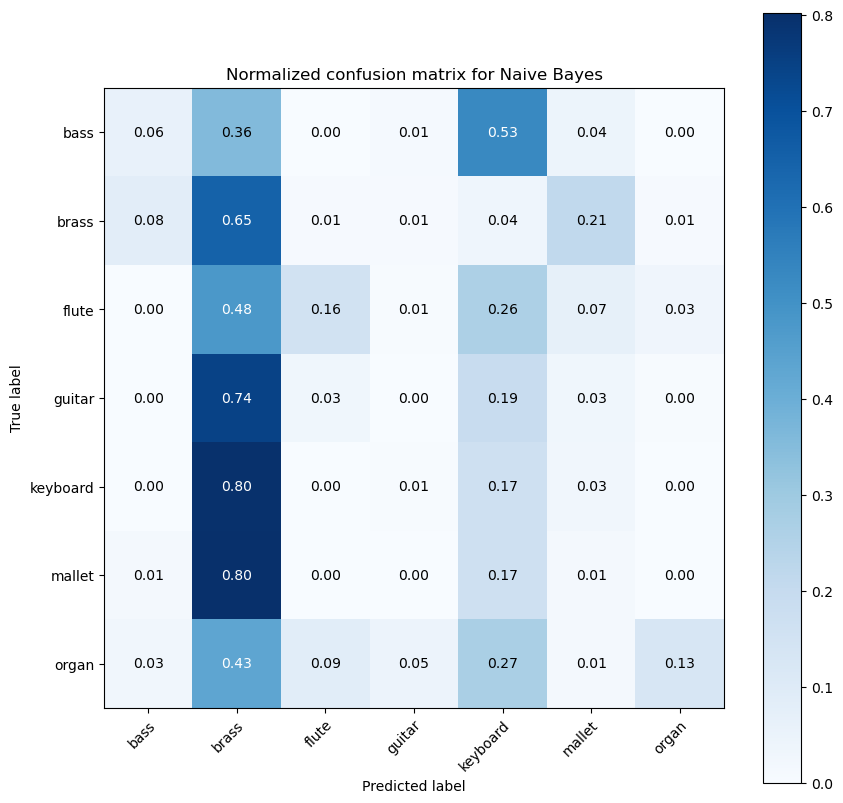

In [40]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('ConfusionMatrix/NB_normalized.png')

# Random Forests

In [41]:
#instantiate the random forest
clf_Rf =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [42]:
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [43]:
y_pred_RF = clf_Rf.predict(X_test)

In [44]:
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 57.64%


Normalized confusion matrix
[[0.60854093 0.00237248 0.00355872 0.09727165 0.11150652 0.15776987
  0.01897983]
 [0.21189591 0.68773234 0.02973978 0.0260223  0.02973978 0.00371747
  0.01115242]
 [0.08333333 0.01111111 0.8        0.         0.         0.04444444
  0.06111111]
 [0.21472393 0.00766871 0.0107362  0.51840491 0.18251534 0.05521472
  0.0107362 ]
 [0.21801567 0.01958225 0.01044386 0.18929504 0.5        0.04699739
  0.0156658 ]
 [0.13861386 0.02475248 0.         0.08910891 0.21287129 0.52970297
  0.0049505 ]
 [0.1374502  0.07569721 0.06175299 0.02390438 0.05378486 0.05378486
  0.5936255 ]]


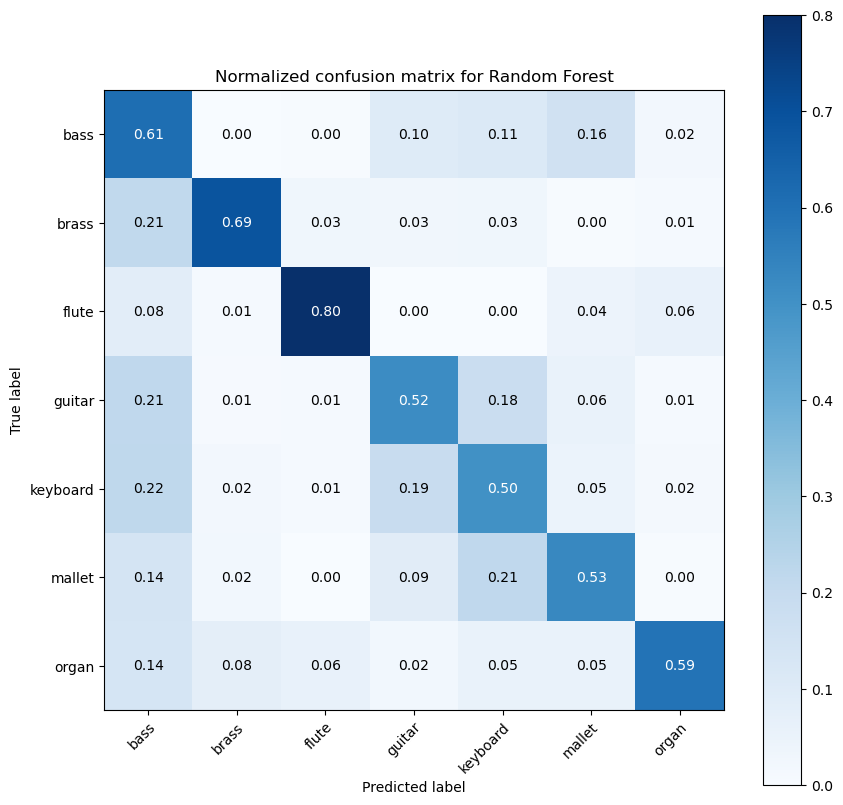

In [45]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.savefig('ConfusionMatrix/RF_Normalized.png')

## Grid Search

In [46]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [47]:
param_dist = {"n_estimators" : [20, 40, 60, 80],
              "max_depth": [10, 20, 30, 40],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [48]:
#instantiate a new random forest
clf_RF_CV=RandomForestClassifier()

#set number of iterations
n_iter_search = 20
#creat the random search class
random_search_RF = RandomizedSearchCV(clf_RF_CV, param_distributions=param_dist,
                                      n_iter=n_iter_search, cv=5)
#
random_search_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17f9c6280>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17f9ca610>,
                                        'n_estimators': [20, 40, 60, 80]})

In [49]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest is 60.31%


Normalized confusion matrix
[[0.6109134  0.00118624 0.00237248 0.08422301 0.113879   0.1826809
  0.00474496]
 [0.19330855 0.72862454 0.03717472 0.02230483 0.01858736 0.
  0.        ]
 [0.06111111 0.00555556 0.83333333 0.         0.         0.02222222
  0.07777778]
 [0.16257669 0.         0.00766871 0.5291411  0.21779141 0.06441718
  0.01840491]
 [0.17101828 0.00652742 0.00261097 0.21148825 0.54438642 0.04308094
  0.02088773]
 [0.06930693 0.0049505  0.0049505  0.04455446 0.20792079 0.66831683
  0.        ]
 [0.17330677 0.04780876 0.06972112 0.00199203 0.05577689 0.05179283
  0.59960159]]


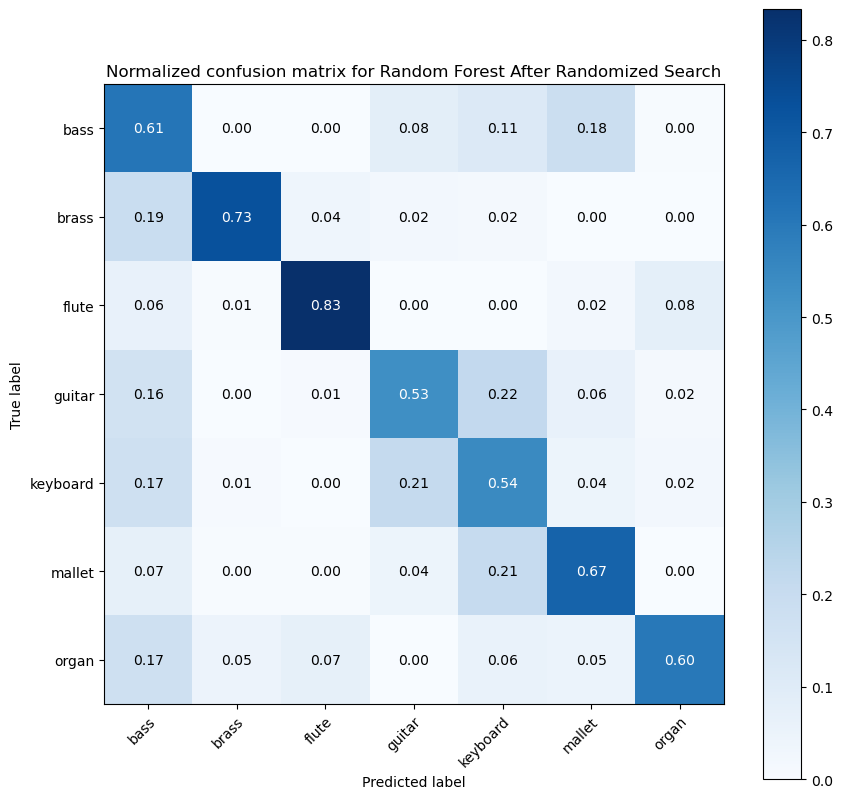

In [50]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest After Randomized Search')
plt.savefig('ConfusionMatrix/RF_Normalized_RandomSearch.png')

In [51]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
                       max_features=10, min_samples_split=8, n_estimators=80)

In [52]:
# pickle the trained model
with open("SavedModels/random_search_RF.pickle", mode='wb') as file:
    pickle.dump(random_search_RF, file)

# SVM

In [53]:
#instantiate the sclaer
scaler = MinMaxScaler()

In [54]:
#scale the feature space
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [55]:
#instatiate the  classifier
clf_svm = SVC(C=0.1)

In [56]:
clf_svm.fit(X_train_scale, y_train)

SVC(C=0.1)

In [57]:
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

/Users/mariechu/opt/anaconda3/envs/music/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of SVMs is 5.27%


In [58]:
#display non normalized confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[  0,   0, 843,   0,   0,   0,   0],
       [  0,   0, 269,   0,   0,   0,   0],
       [  0,   0, 180,   0,   0,   0,   0],
       [  0,   0, 652,   0,   0,   0,   0],
       [  0,   0, 766,   0,   0,   0,   0],
       [  0,   0, 202,   0,   0,   0,   0],
       [  0,   0, 502,   0,   0,   0,   0]])

Normalized confusion matrix
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


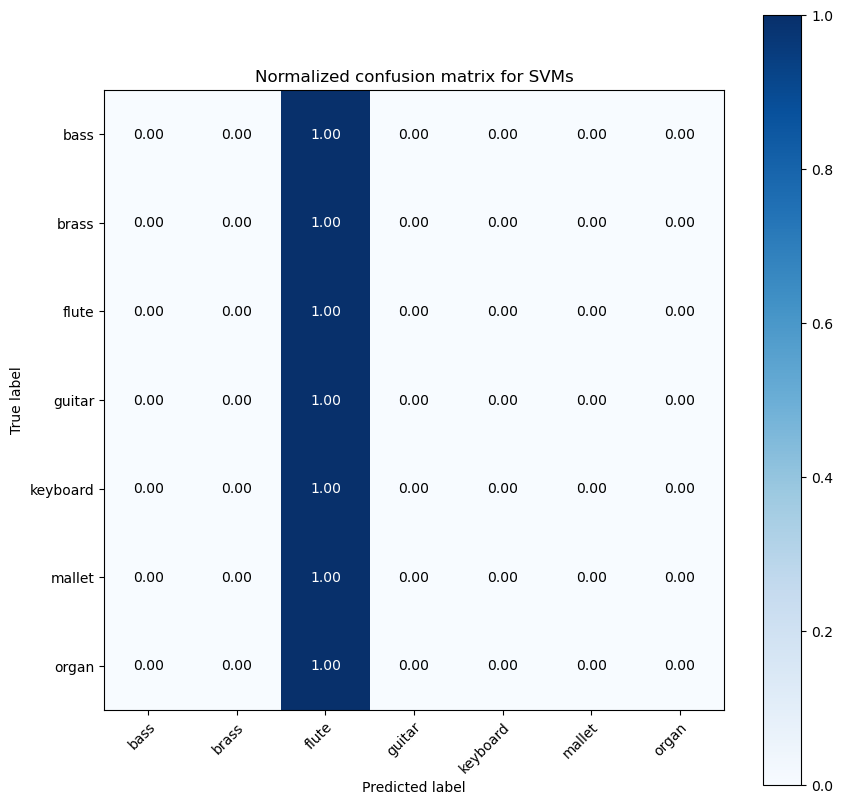

In [59]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('ConfusionMatrix/SVM_Normalized.png')